<a href="https://colab.research.google.com/github/TehLedRed/SpringerManuscript/blob/main/Application_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
%pip install lifelines
clear_output()

In [ ]:
%cd /content/drive/MyDrive/Mestrado/
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

/content/drive/MyDrive/Mestrado


# Load clinical data and Kaplan-Meier plot

In [ ]:
originalDataset = pd.read_csv("PCM/data/oasis3.csv")

dataTrain = pd.read_csv("PCM/data/trainSet.csv")  # n=280
dataTest = pd.read_csv("PCM/data/testSet.csv")

mri = np.load("PCM/data/mri.npz")
mriTrain = mri["train_images"]
mriTest = mri["test_images"]

mriTrain = np.delete(mriTrain, 230, axis=0)

dataset = pd.concat([dataTrain, dataTest])
vars = ["mmse", "ageAtEntry", "IntraCranialVol", "SubCortGrayVol", "MR.ID", "delta"]

## Kaplan-Meier curve

In [ ]:
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.rc('xtick', labelsize=14)
plt.rcParams["figure.figsize"] = (20,12)

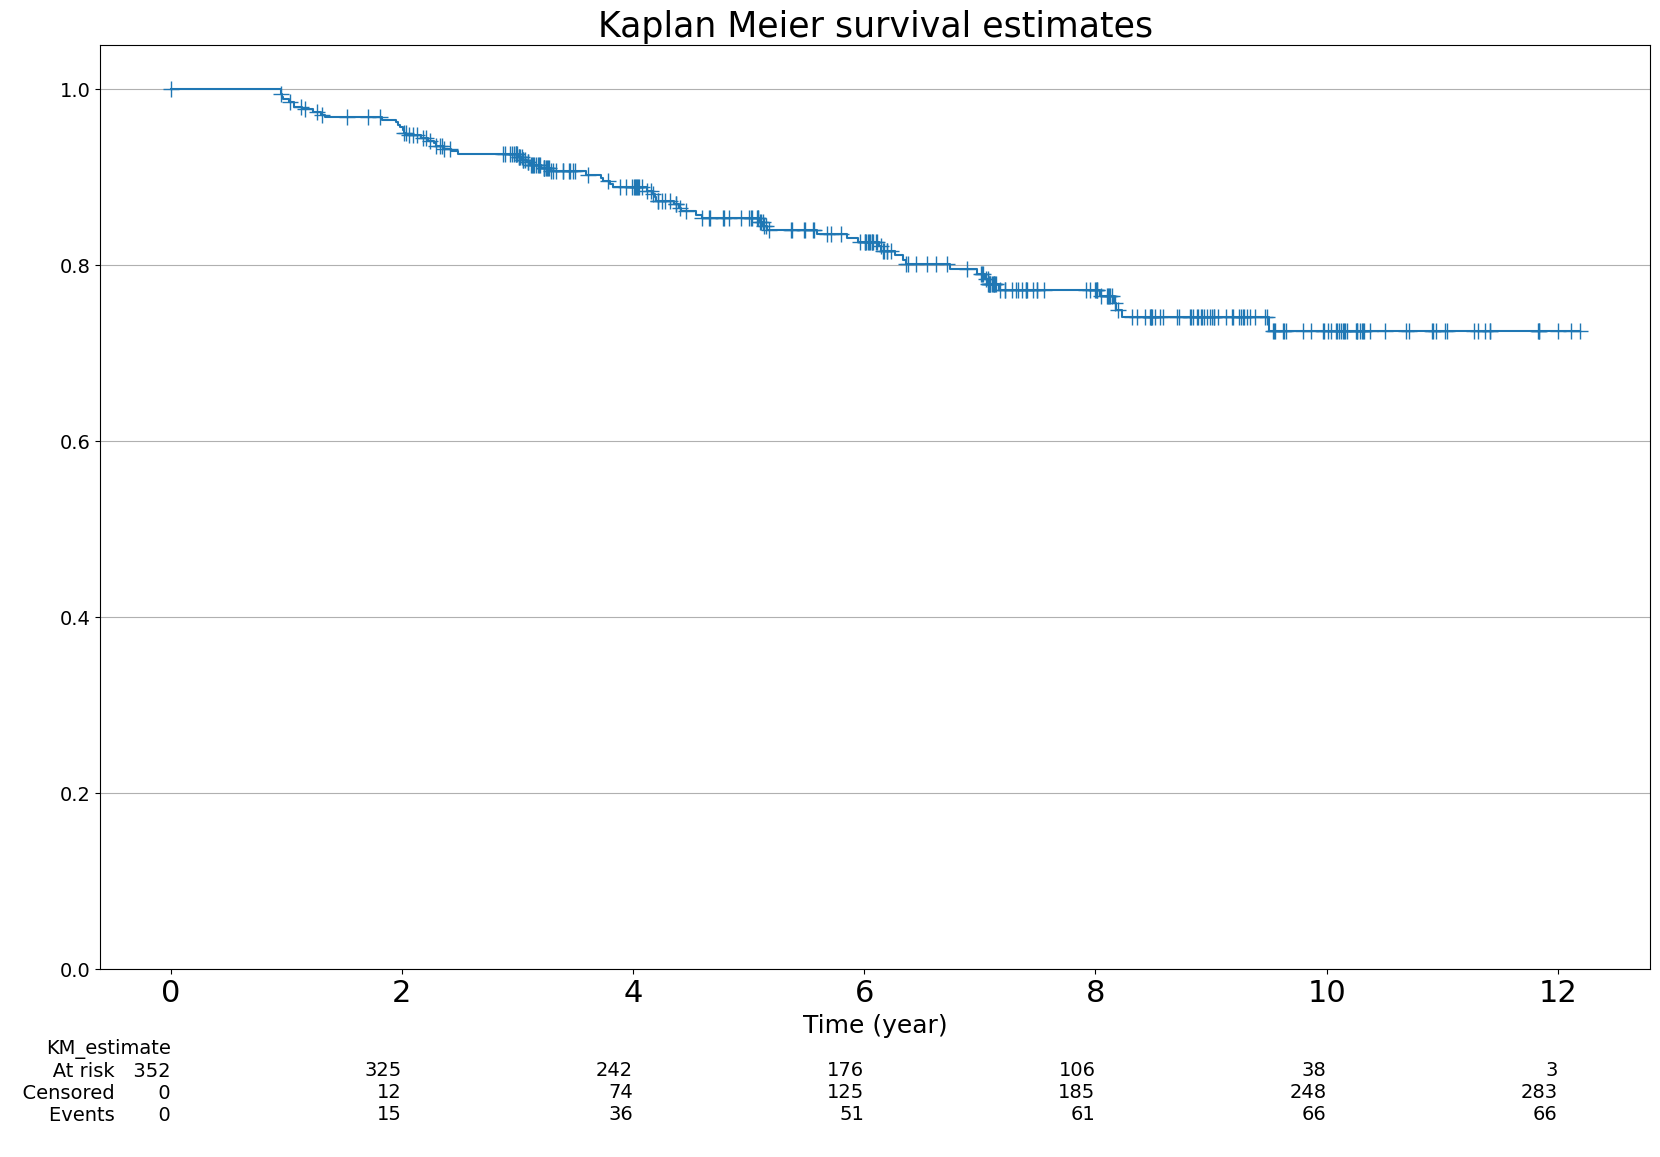

In [ ]:
## create a kmf object
kmf = KaplanMeierFitter()

## Fit the data into the model
kmf.fit(dataset.time, dataset.delta)

KM_plt = kmf.plot(show_censors=True, ci_show=False, legend=False)
KM_plt.set_ylim([0.0, 1.05])
KM_plt.set_xlabel('Time (year)', fontsize=18)
KM_plt.tick_params(axis = 'x', labelsize=22)
KM_plt.set_title("Kaplan Meier survival estimates", fontsize=25)
KM_plt.grid(axis='y')
# plt.savefig('KM.png', dpi=300)
from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf, ax=KM_plt)
plt.show()

In [ ]:
np.where(dataset.delta.values==1)[0].size

66

# Fitted test set

In [ ]:
fitted = pd.read_csv("PCM/data/new/resTest.csv")
fitted["thetaHat"] = fitted.apply(lambda  x: np.exp(x.eta), axis=1)
fitted["p0"] = fitted.apply(lambda  x: (1 + 0.01*x.thetaHat)**-100, axis=1)
fitted.head()

,eta,mi,S1,thetaHat,p0
0,-1.626434,0.157106,0.799309,0.196630,0.821653
1,-4.087444,0.005703,0.339894,0.016782,0.983359
2,-3.310576,0.030298,0.830231,0.036495,0.964169
3,-2.385891,0.035829,0.389635,0.092007,0.912137
4,-1.958777,0.052459,0.372294,0.141031,0.868549


In [ ]:
fitted.quantile(q=[0,0.25,0.5,0.75,1])

,eta,mi,S1,thetaHat,p0
0.00,-5.454126,0.000582,0.035123,0.004279,0.000051
0.25,-2.393067,0.034203,0.253785,0.091356,0.568417
0.50,-1.469631,0.168758,0.679267,0.230013,0.794733
0.75,-0.568312,0.971670,0.898249,0.566524,0.912731
1.00,2.340902,9.675874,1.000000,10.390608,0.995731


In [ ]:
np.quantile(range(72),q=[0,0.25,0.5,0.75,1])

array([ 0.  , 17.75, 35.5 , 53.25, 71.  ])

In [ ]:
sorted = fitted.sort_values(by="thetaHat", ascending=True)
quant_loc = sorted.index[[0, 18, 35, 54, 71]]
sorted.loc[quant_loc]

,eta,mi,S1,thetaHat,p0
15,-5.454126,0.000582,0.136035,0.004279,0.995731
3,-2.385891,0.035829,0.389635,0.092007,0.912137
5,-1.474681,0.217606,0.950967,0.228852,0.795655
66,-0.546972,1.559041,0.956705,0.578699,0.561563
21,2.340902,9.675874,0.937282,10.390608,0.000051


In [ ]:
fitted.thetaHat.values[quant_loc].round(1)

array([ 0. ,  0.1,  0.2,  0.6, 10.4])

In [ ]:
fitted..values[quant_loc].round(3)

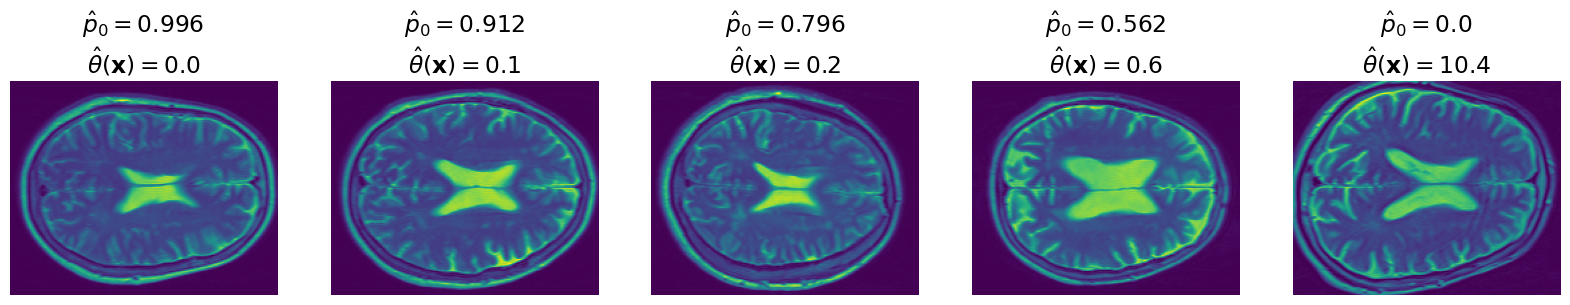

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20,20))
for a, b in enumerate(quant_loc):
  axs[a].imshow(np.squeeze(mriTest[b]))
  axs[a].axis('off')
  axs[a].title.set_text(r'$\hat{p}_0=$' + str(fitted.p0.values[b].round(3)) + '\n$\hat{\\theta}(\mathbf{x})=$' + str(fitted.thetaHat.values[b].round(1)))

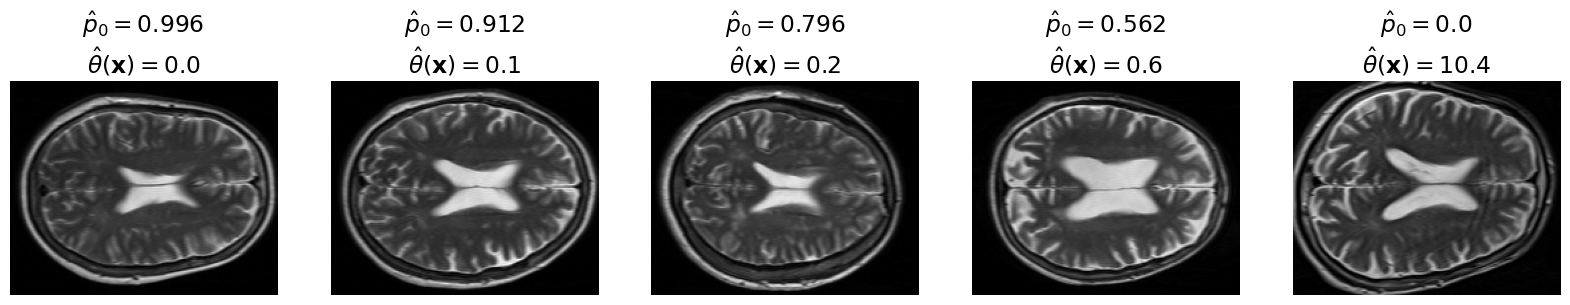

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20,20))
for a, b in enumerate(quant_loc):
  axs[a].imshow(np.squeeze(mriTest[b]), cmap="gray")
  axs[a].axis('off')
  axs[a].title.set_text(r'$\hat{p}_0=$' + str(fitted.p0.values[b].round(3)) + '\n$\hat{\\theta}(\mathbf{x})=$' + str(fitted.thetaHat.values[b].round(1)))